<div style="background-color: black; color: gold; padding: 10px; 
            font-size: 24px; border-radius: 5px; text-align: center;">
    Twitter Sentiment Analysis using Machine Learning Models
</div>
<div style=" color: gray; padding: 10px; 
            font-size: 16px; border-radius: 5px; text-align: center;">
     An In-depth Analysis of Public Sentiments on Twitter Using NLP and Supervised Learning Techniques
</div>
<br>
<div style="color: gray;  text-align: center; font-size: 14px; margin-top: 10px;">
    <strong>Author:</strong> Ahmed Ayman <br>
    <strong>Date:</strong> Apr 2025 <br>
</div>



<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Import Necessary Libraries
</div>


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import re 
import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer



from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


from nltk.corpus import stopwords
from wordcloud import WordCloud


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import warnings 
warnings.filterwarnings('ignore')


<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Load the Data
</div>

In [256]:
df_train = pd.read_csv('twitter_training.csv')
df_valid = pd.read_csv('twitter_validation.csv')

<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Explore data
</div>

In [201]:
df_train.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [202]:
df_train.columns = ['Tweet_ID', 'Entity', 'Sentiment', 'Tweet_Content']
df_train.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [203]:
df_train.sample(10)

,Tweet_ID,Entity,Sentiment,Tweet_Content
15410,3037,Dota2,Neutral,die with honor stfu and enjoy ur bkb
33982,6636,Fortnite,Irrelevant,was I good??
6683,351,Amazon,Negative,if you like this you’ll regret it
19586,12553,WorldOfCraft,Neutral,"Hey @Warcraft!.! In one and a half minutes, ge..."
22764,4301,CS-GO,Neutral,I don't think turmoil understands why CSGO ski...
56710,11330,TomClancysRainbowSix,Irrelevant,Welcome to the forum
46149,11920,Verizon,Neutral,Missing Flashback : Kin – Android ’ The s home...
24116,4533,Google,Neutral,Google Pixel 3A review: a fine phone with a gr...
6423,305,Amazon,Positive,And @PAYBACKIndia WooHoo!!!. 2016 I have recei...
69317,3875,Cyberpunk2077,Positive,"haa, rugi gila. each mission and stories are c..."


In [204]:
print(df_train['Sentiment'].unique())

['Positive' 'Neutral' 'Negative' 'Irrelevant']


In [205]:
df_train = df_train[df_train['Sentiment'] != 'Irrelevant']


In [206]:
df_train.info

<bound method DataFrame.info of        Tweet_ID       Entity Sentiment  \
0          2401  Borderlands  Positive   
1          2401  Borderlands  Positive   
2          2401  Borderlands  Positive   
3          2401  Borderlands  Positive   
4          2401  Borderlands  Positive   
...         ...          ...       ...   
74676      9200       Nvidia  Positive   
74677      9200       Nvidia  Positive   
74678      9200       Nvidia  Positive   
74679      9200       Nvidia  Positive   
74680      9200       Nvidia  Positive   

                                           Tweet_Content  
0      I am coming to the borders and I will kill you...  
1      im getting on borderlands and i will kill you ...  
2      im coming on borderlands and i will murder you...  
3      im getting on borderlands 2 and i will murder ...  
4      im getting into borderlands and i can murder y...  
...                                                  ...  
74676  Just realized that the Windows partition of

In [207]:
df_train.isna().sum()

Tweet_ID           0
Entity             0
Sentiment          0
Tweet_Content    571
dtype: int64

In [208]:
df_train.describe()

,Tweet_ID
count,61691.000000
mean,6538.737563
std,3757.422667
min,1.000000
25%,3263.000000
50%,6755.000000
75%,9697.000000
max,13198.000000


In [209]:
df_train.duplicated().sum()

2294

In [210]:
df_train.shape

(61691, 4)

<Axes: >

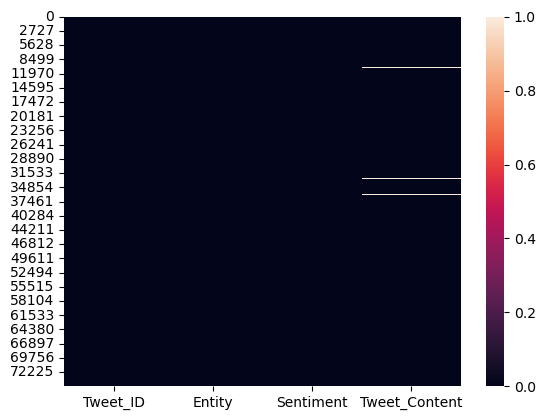

In [211]:
sns.heatmap(df_train.isna())


In [212]:
df_train = df_train[['Sentiment','Tweet_Content']]

In [213]:
df_train.head()

,Sentiment,Tweet_Content
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [214]:
df_train.isna().sum()

Sentiment          0
Tweet_Content    571
dtype: int64

In [215]:
df_train = df_train.dropna(subset=['Tweet_Content'])

In [216]:
df_train.isna().sum()

Sentiment        0
Tweet_Content    0
dtype: int64

In [217]:
df_train['Tweet_Content'].value_counts()

Tweet_Content
At the same time, despite the fact that there are currently some 100 million people living below the poverty line, most of them do not have access to health services and do not have access to health care, while most of them do not have access to health care.    139
                                                                                                                                                                                                                                                                      139
It is not the first time that the EU Commission has taken such a step.                                                                                                                                                                                                139
<unk>                                                                                                                                                                                       


<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Preprocessing tweet text: convert to lowercase and remove special characters
</div>


In [218]:
df_train['Tweet_Content'] = df_train['Tweet_Content'].apply(lambda x: x.lower())
df_train['Tweet_Content'] = df_train ['Tweet_Content'].apply(lambda x: re.sub('[^a-zA-z0-9\s]',' ',x))


<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Print size Sentiment
</div>

In [219]:
print(df_train[df_train['Sentiment']=='Positive'].size)
print(df_train[df_train['Sentiment']=='Negative'].size)
print(df_train[df_train['Sentiment']=='Neutral'].size)

41308
44716
36216



<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Encode sentiment labels into numerical values using LabelEncoder
</div>

In [220]:
label = LabelEncoder()
df_train['Sentiment'] = label.fit_transform(df_train['Sentiment'])

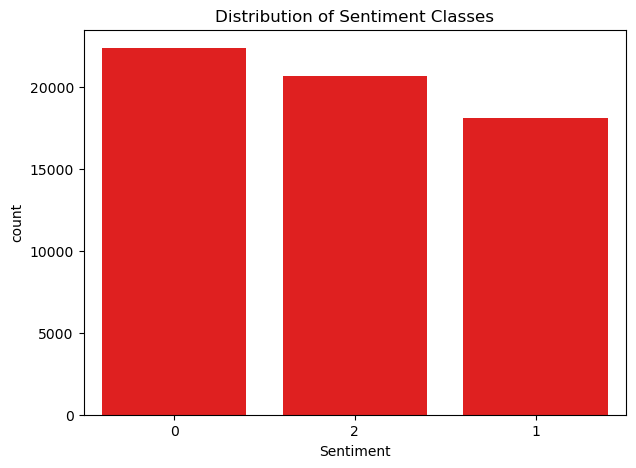

In [221]:
plt.figure(figsize=(7,5))
sns.countplot(data=df_train, x='Sentiment', order=df_train['Sentiment'].value_counts().index,color='red')
plt.title('Distribution of Sentiment Classes')
plt.show()


<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Generate and display Word Clouds for each sentiment category based on tweet content

</div>

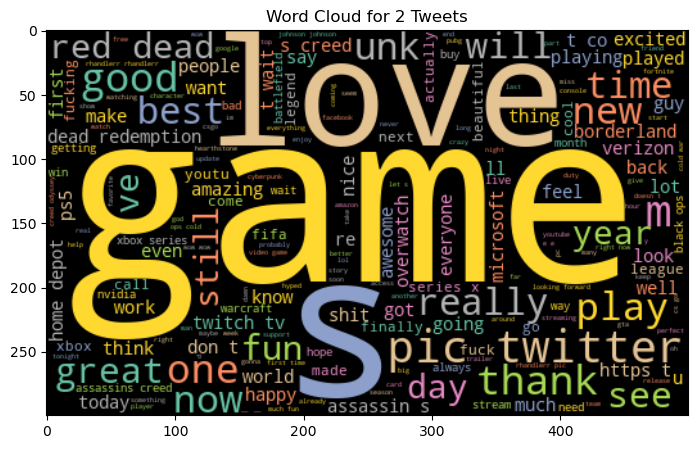

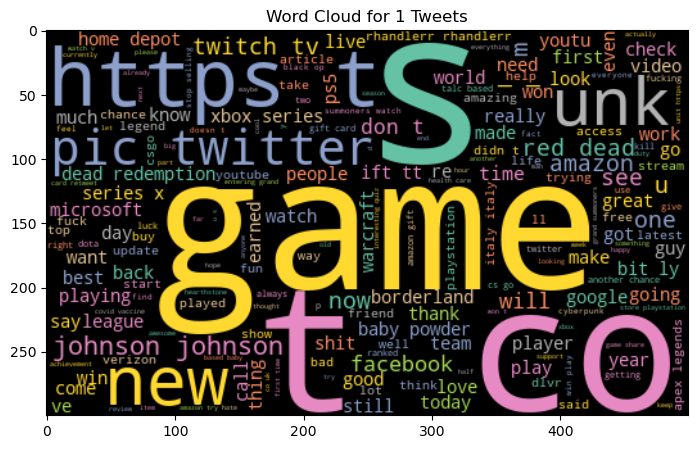

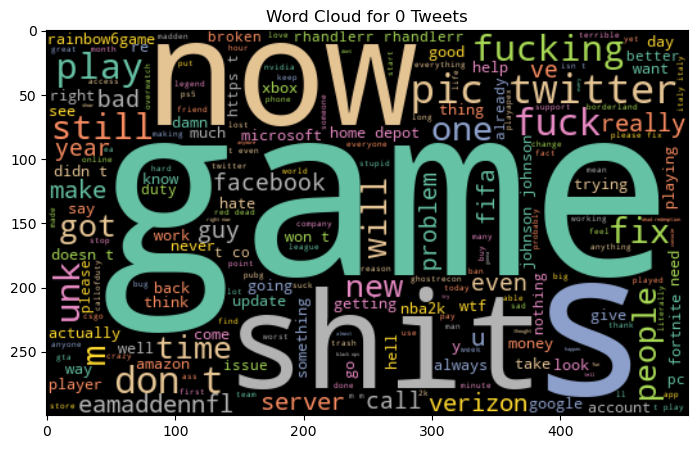

In [222]:
def plot_wordcloud(sentiment_label):
    text = ' '.join(df_train[df_train['Sentiment'] == sentiment_label]['Tweet_Content'].dropna())
    wordcloud = WordCloud(width=500, height=300, background_color='black', colormap='Set2').generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment_label} Tweets')
    plt.show()

for sentiment in df_train['Sentiment'].unique():
    plot_wordcloud(sentiment)



<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Define input features and target labels for the model

</div>

In [223]:
input_ = df_train['Tweet_Content']
target  = df_train['Sentiment']

In [224]:
X_train, X_test, y_train, y_test = train_test_split(input_, target, test_size=0.3)


<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Vectorize the text data using TF-IDF with unigrams  bigrams  and trigrams 

</div>

In [225]:
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,3)) 
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Building Model

</div>

In [127]:
models_dict = {
    'LogisticRegression': LogisticRegression(max_iter=10_000),
    'Support Vector': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'XGBClassifier': XGBClassifier(),
    'CatBoostClassifier': CatBoostClassifier(verbose=False),
    
}

<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Find the best Model


</div>

In [141]:
results = []


for name, model in models_dict.items():
    print(f"\nTraining: {name}")
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    acc = accuracy_score(y_test, y_pred)
    
    results.append({'Model': name, 'Accuracy': acc, 'Confusion Matrix': confusion_matrix(y_test, y_pred)})

    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=label.classes_))



Training: LogisticRegression
Accuracy: 0.8227
              precision    recall  f1-score   support

    Negative       0.82      0.88      0.85      6690
     Neutral       0.84      0.74      0.79      5507
    Positive       0.81      0.83      0.82      6139

    accuracy                           0.82     18336
   macro avg       0.82      0.82      0.82     18336
weighted avg       0.82      0.82      0.82     18336


Training: Support Vector
Accuracy: 0.9170
              precision    recall  f1-score   support

    Negative       0.91      0.94      0.92      6690
     Neutral       0.92      0.89      0.91      5507
    Positive       0.92      0.91      0.92      6139

    accuracy                           0.92     18336
   macro avg       0.92      0.92      0.92     18336
weighted avg       0.92      0.92      0.92     18336


Training: KNeighborsClassifier
Accuracy: 0.8569
              precision    recall  f1-score   support

    Negative       0.85      0.89      0.87 


<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Representing the best model on heatmap


</div>

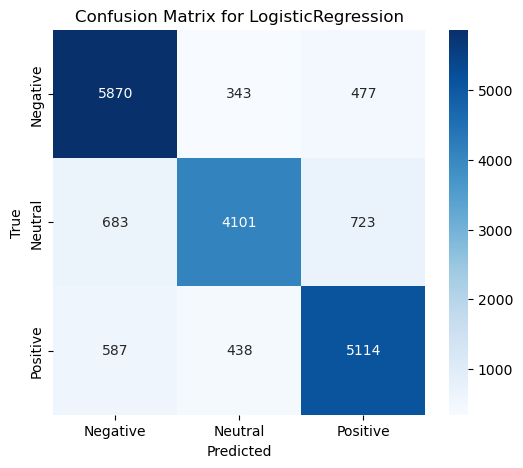

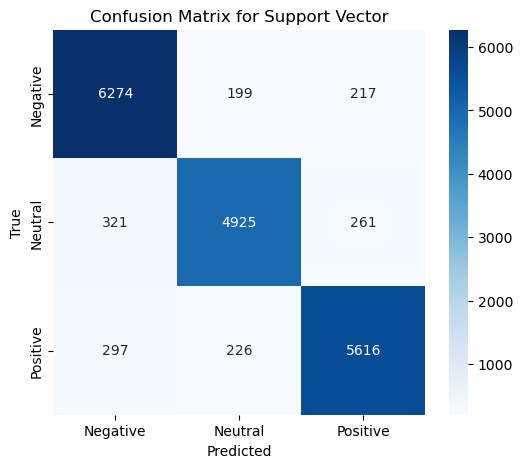

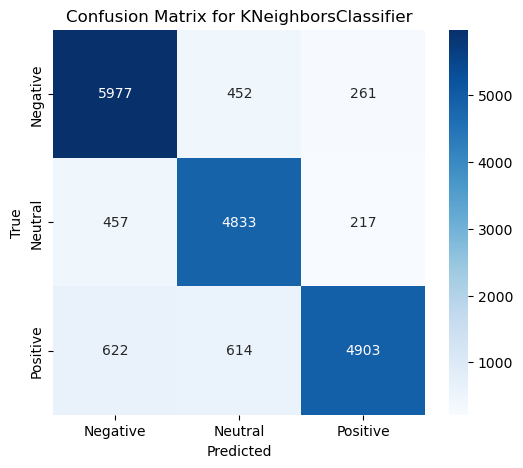

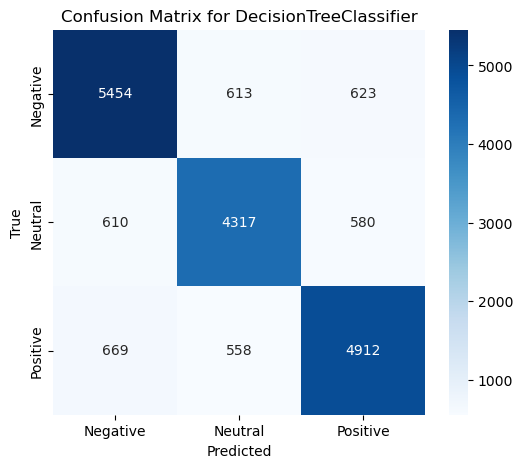

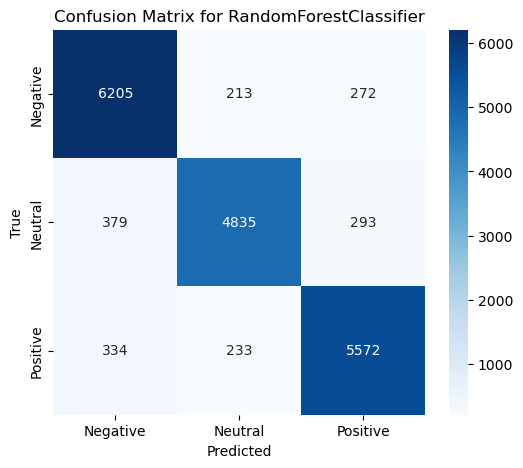

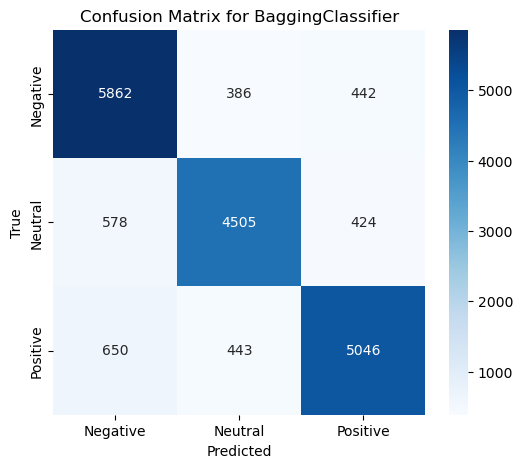

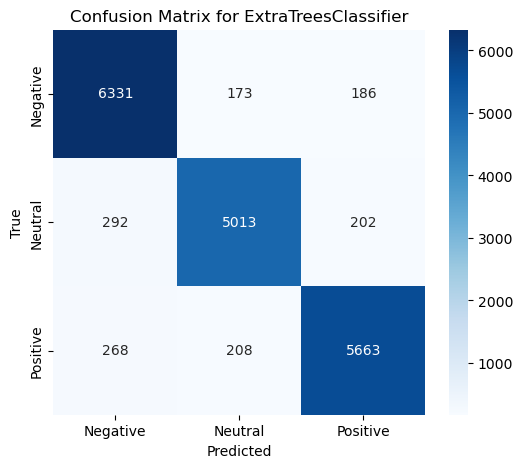

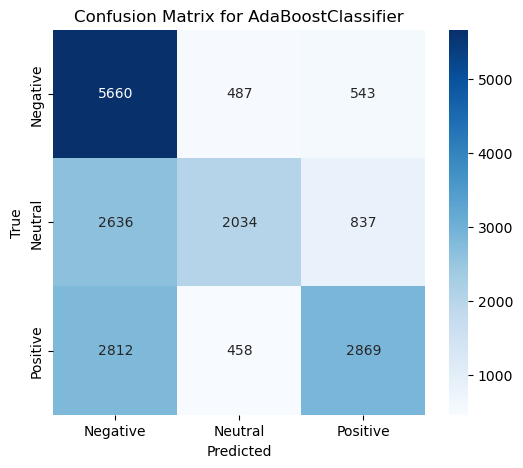

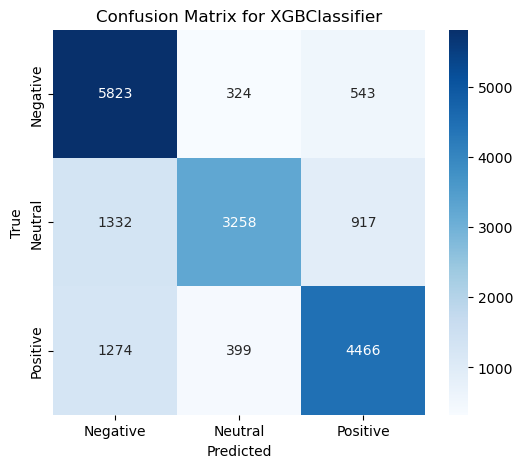

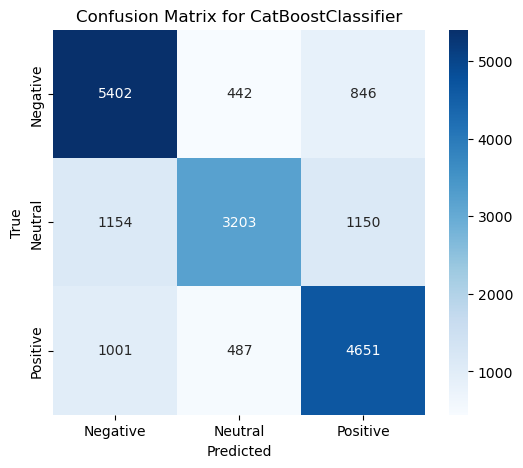


Summary of Model Performances:
                    Model  Accuracy
0      LogisticRegression  0.822699
1          Support Vector  0.917048
2    KNeighborsClassifier  0.856948
3  DecisionTreeClassifier  0.800774
4  RandomForestClassifier  0.905977
5       BaggingClassifier  0.840587
6    ExtraTreesClassifier  0.927520
7      AdaBoostClassifier  0.576080
8           XGBClassifier  0.738820
9      CatBoostClassifier  0.722949


In [142]:
for result in results:
    name = result['Model']
    cm = result['Confusion Matrix']
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label.classes_, yticklabels=label.classes_)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

results_df = pd.DataFrame(results)
print("\nSummary of Model Performances:")
print(results_df[['Model', 'Accuracy']])



<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Explore the data test  and Preprocessing


</div>

In [257]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                              --------------  ----- 
 0   3364                                                                                                                                                                                                                                                999 non-null    int64 
 1   Facebook                                                                   

In [259]:
df_valid.columns = ['Tweet_ID', 'Entity', 'Sentiment', 'Tweet_Content']
df_valid = df_valid[df_valid['Sentiment'] != 'Irrelevant']

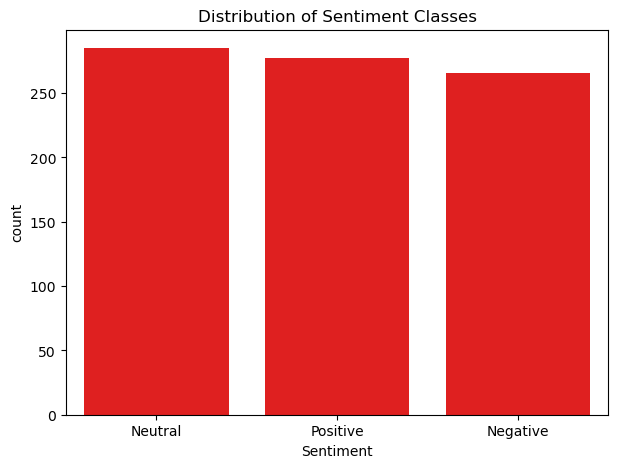

In [260]:
plt.figure(figsize=(7,5))
sns.countplot(data=df_valid, x='Sentiment', order=df_valid['Sentiment'].value_counts().index,color='red')
plt.title('Distribution of Sentiment Classes')
plt.show()

<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Preprocessing tweet text: convert to lowercase and remove special characters test
</div>

In [261]:

df_valid = df_valid.dropna(subset=['Tweet_Content'])

df_valid['Tweet_Content'] = df_valid['Tweet_Content'].apply(lambda x: x.lower())
df_valid['Tweet_Content'] = df_valid ['Tweet_Content'].apply(lambda x: re.sub('[^a-zA-z0-9\s]',' ',x))


In [262]:
df_valid.head()


,Tweet_ID,Entity,Sentiment,Tweet_Content
0,352,Amazon,Neutral,bbc news amazon boss jeff bezos rejects clai...
1,8312,Microsoft,Negative,microsoft why do i pay for word when it funct...
2,4371,CS-GO,Negative,csgo matchmaking is so full of closet hacking ...
3,4433,Google,Neutral,now the president is slapping americans in the...
4,6273,FIFA,Negative,hi eahelp i ve had madeleine mccann in my cel...


In [263]:
df_valid.isna().sum()

Tweet_ID         0
Entity           0
Sentiment        0
Tweet_Content    0
dtype: int64

In [264]:
df_valid['Sentiment']=label.fit_transform(df_valid['Sentiment'])


In [265]:
df_valid.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content
0,352,Amazon,1,bbc news amazon boss jeff bezos rejects clai...
1,8312,Microsoft,0,microsoft why do i pay for word when it funct...
2,4371,CS-GO,0,csgo matchmaking is so full of closet hacking ...
3,4433,Google,1,now the president is slapping americans in the...
4,6273,FIFA,0,hi eahelp i ve had madeleine mccann in my cel...


In [269]:
x_val = vectorizer.transform(df_valid['Tweet_Content'])
y_val = df_valid['Sentiment']

In [276]:
df_valid['Sentiment'].unique()

array([1, 0, 2])

In [270]:
x_val

<828x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 19618 stored elements in Compressed Sparse Row format>

<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Best Model 
</div>

In [271]:
best_model = ExtraTreesClassifier()
best_model.fit(X_train_vec, y_train)

ExtraTreesClassifier()


<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Predict sentiment labels for the test data using the best trained model
</div>

In [272]:
y_pred = best_model.predict(X_test_vec)

In [273]:
y_pred

array([2, 0, 2, ..., 1, 1, 2])

 
<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Evaluate the best model on validation data and display accuracy and classification report Validation Accuracy: 96%
</div>


In [274]:
y_val_pred = best_model.predict(x_val)


val_acc = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_acc:.4f}")
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=label.classes_))

Validation Accuracy: 0.9662
Validation Classification Report:
              precision    recall  f1-score   support

    Negative       0.98      0.96      0.97       266
     Neutral       0.95      0.98      0.97       285
    Positive       0.97      0.95      0.96       277

    accuracy                           0.97       828
   macro avg       0.97      0.97      0.97       828
weighted avg       0.97      0.97      0.97       828



<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
    Test Model
</div>


In [280]:
def test_model (text): 
    test_word = [text] 
    
    test_word_vec = vectorizer.transform(test_word)
    
    prediction = best_model.predict(test_word_vec)
    predicted_label = label.inverse_transform([prediction[0]])[0]
    
    print(f"Prediction for the test word: {predicted_label}")  

In [288]:
test_model("I absolutely love this product, it's amazing")

Prediction for the test word: Positive


In [289]:
 test_model("I hate how slow and buggy this app is")

Prediction for the test word: Negative


In [295]:
test_model("It is raining outside")

Prediction for the test word: Neutral


<div style="background-color: black; color: gold; padding: 15px; 
            font-size: 18px; border-radius: 8px; font-weight: bold;">
    💬 The Twitter Sentiment Analysis model is now complete!<br>  
    🤖 Powered by Machine Learning and NLP techniques, it classifies public sentiments with high accuracy. <br> 
    📊 A powerful tool for understanding trends, public opinion, and market insights in real-time! <br> 
</div>


<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 30px; border-radius: 5px;">
    Thanks!  
    <br>
    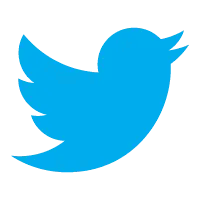
</div>